In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 45.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Viskom/mask_wearing/mask_wearing.zip -d /content/mask_wearing

Archive:  /content/drive/MyDrive/Viskom/mask_wearing/mask_wearing.zip
  inflating: /content/mask_wearing/README.dataset.txt  
  inflating: /content/mask_wearing/README.roboflow.txt  
  inflating: /content/mask_wearing/data.yaml  
   creating: /content/mask_wearing/test/
   creating: /content/mask_wearing/test/images/
 extracting: /content/mask_wearing/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg  
 extracting: /content/mask_wearing/test/images/1224331650_g_400-w_g_jpg.rf.b816f49e2d84044fc997a8cbd55c347d.jpg  
 extracting: /content/mask_wearing/test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
 extracting: /content/mask_wearing/test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
 extracting: /content/mask_wearing/test/images/15391513324714o1n0r10n6_jpg.rf.a91fbc7be8a94ed3c48d2e4b35bd53bb.jpg  
 extracting: /content/mask_wearing/test/images/15391513329330sooq10859_jpg.rf.

In [5]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # Load pre-trained YOLOv11 model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 236MB/s]


In [6]:
model.train(data="/content/mask_wearing/data.yaml", epochs=50, imgsz=416)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/mask_wearing/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 69.6MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/mask_wearing/train/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<00:00, 842.03it/s]

train: New cache created: /content/mask_wearing/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/mask_wearing/valid/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 1824.87it/s]

val: New cache created: /content/mask_wearing/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.988      3.714      1.437        105        416: 100%|██████████| 7/7 [00:42<00:00,  6.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.32s/it]

                   all         29        162      0.011      0.513     0.0144    0.00663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       1.57      3.303      1.199         51        416: 100%|██████████| 7/7 [00:36<00:00,  5.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.50s/it]

                   all         29        162     0.0133       0.69     0.0646     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.495      2.732      1.085        109        416: 100%|██████████| 7/7 [00:35<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         29        162     0.0143      0.873      0.169     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.498       2.29      1.077         76        416: 100%|██████████| 7/7 [00:38<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]

                   all         29        162     0.0142      0.833      0.229      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G       1.46      1.754       1.09         64        416: 100%|██████████| 7/7 [00:37<00:00,  5.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         29        162        0.9      0.088      0.259      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.533       1.57      1.111         56        416: 100%|██████████| 7/7 [00:38<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         29        162      0.885     0.0705      0.241      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.551      1.551      1.095         90        416: 100%|██████████| 7/7 [00:38<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         29        162      0.884     0.0932      0.168     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.448      1.425      1.108         76        416: 100%|██████████| 7/7 [00:36<00:00,  5.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         29        162      0.865     0.0761      0.166     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.459      1.353       1.09         66        416: 100%|██████████| 7/7 [00:36<00:00,  5.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.99s/it]

                   all         29        162      0.892      0.088      0.235      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.409      1.331      1.085         80        416: 100%|██████████| 7/7 [00:37<00:00,  5.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         29        162      0.904      0.104      0.281       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G       1.38      1.284      1.112         49        416: 100%|██████████| 7/7 [00:37<00:00,  5.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

                   all         29        162       0.89      0.162      0.316      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.409      1.271      1.061        114        416: 100%|██████████| 7/7 [00:39<00:00,  5.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         29        162      0.907      0.261      0.384       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.404      1.284      1.063        165        416: 100%|██████████| 7/7 [00:39<00:00,  5.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]

                   all         29        162      0.915      0.311      0.422      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.409      1.218      1.058         86        416: 100%|██████████| 7/7 [00:39<00:00,  5.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]

                   all         29        162      0.523      0.449      0.428      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.416       1.23      1.073         82        416: 100%|██████████| 7/7 [00:36<00:00,  5.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.46s/it]

                   all         29        162      0.447      0.426       0.39      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.377      1.202      1.122         52        416: 100%|██████████| 7/7 [00:36<00:00,  5.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]

                   all         29        162      0.488      0.402      0.429      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.317      1.121      1.052         58        416: 100%|██████████| 7/7 [00:36<00:00,  5.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         29        162      0.478      0.402      0.433      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.381      1.159      1.057         74        416: 100%|██████████| 7/7 [00:38<00:00,  5.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         29        162      0.553      0.482      0.504       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.28       1.16      1.059         35        416: 100%|██████████| 7/7 [00:38<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]

                   all         29        162       0.49      0.492      0.513       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.314      1.091      1.078         59        416: 100%|██████████| 7/7 [00:37<00:00,  5.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]

                   all         29        162      0.545       0.46      0.516      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.341      1.065      1.044        132        416: 100%|██████████| 7/7 [00:38<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         29        162      0.567      0.449       0.52      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G        1.3      1.051       1.05         75        416: 100%|██████████| 7/7 [00:37<00:00,  5.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]

                   all         29        162      0.538      0.554      0.588      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G       1.28      1.043      1.045         77        416: 100%|██████████| 7/7 [00:36<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

                   all         29        162      0.602      0.623      0.639      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.326          1      1.056         70        416: 100%|██████████| 7/7 [00:37<00:00,  5.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         29        162      0.621      0.741      0.679      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.273      1.044      1.048         37        416: 100%|██████████| 7/7 [00:38<00:00,  5.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]

                   all         29        162       0.68      0.741      0.719      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.274     0.9606      1.045         91        416: 100%|██████████| 7/7 [00:37<00:00,  5.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         29        162      0.873      0.595      0.743      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.309      1.006      1.047         90        416: 100%|██████████| 7/7 [00:37<00:00,  5.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

                   all         29        162      0.759      0.616      0.677      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.275     0.9713      1.035         71        416: 100%|██████████| 7/7 [00:37<00:00,  5.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]

                   all         29        162      0.726      0.587      0.663      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.321     0.9914       1.04        107        416: 100%|██████████| 7/7 [00:37<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.72s/it]

                   all         29        162      0.766      0.614      0.673      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.224     0.9454      1.019         72        416: 100%|██████████| 7/7 [00:37<00:00,  5.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all         29        162      0.821      0.517      0.687      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.191     0.9315      1.018         45        416: 100%|██████████| 7/7 [00:37<00:00,  5.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         29        162      0.905       0.53       0.69      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.156     0.8543      1.018         88        416: 100%|██████████| 7/7 [00:38<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         29        162      0.926      0.567      0.682      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.221     0.8662      1.021         69        416: 100%|██████████| 7/7 [00:37<00:00,  5.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         29        162      0.923      0.549      0.689      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.211     0.8645      1.036         85        416: 100%|██████████| 7/7 [00:36<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         29        162      0.934      0.538      0.723      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.141     0.8679      1.005         60        416: 100%|██████████| 7/7 [00:36<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.55s/it]

                   all         29        162      0.929      0.584      0.763      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.176     0.8601     0.9913        116        416: 100%|██████████| 7/7 [00:36<00:00,  5.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         29        162      0.765      0.681       0.77      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.105     0.8394     0.9915         59        416: 100%|██████████| 7/7 [00:36<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]

                   all         29        162      0.723      0.688      0.754      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.189     0.8888      1.021        119        416: 100%|██████████| 7/7 [00:38<00:00,  5.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         29        162      0.684      0.687       0.74      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.145     0.8767       1.01         38        416: 100%|██████████| 7/7 [00:36<00:00,  5.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all         29        162      0.717      0.685      0.778      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.133     0.8068      1.007         53        416: 100%|██████████| 7/7 [00:35<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.33s/it]

                   all         29        162      0.873      0.659      0.795      0.454


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.105     0.7937     0.9661         55        416: 100%|██████████| 7/7 [00:36<00:00,  5.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         29        162      0.865      0.662      0.791      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.062     0.7603     0.9597         59        416: 100%|██████████| 7/7 [00:37<00:00,  5.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

                   all         29        162      0.936      0.681      0.833      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.059     0.7398     0.9646         75        416: 100%|██████████| 7/7 [00:38<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

                   all         29        162      0.865      0.706      0.836      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.086     0.8025     0.9663         85        416: 100%|██████████| 7/7 [00:36<00:00,  5.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.35s/it]

                   all         29        162      0.911      0.671      0.832      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.063     0.7631     0.9508         54        416: 100%|██████████| 7/7 [00:35<00:00,  5.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

                   all         29        162       0.93      0.652      0.835      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.039     0.7545     0.9595         35        416: 100%|██████████| 7/7 [00:36<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         29        162       0.84      0.737      0.832      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.059     0.7731     0.9585         31        416: 100%|██████████| 7/7 [00:37<00:00,  5.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         29        162      0.784      0.798       0.83      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.039     0.7311     0.9536         45        416: 100%|██████████| 7/7 [00:37<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]

                   all         29        162       0.77      0.798      0.829      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.054     0.7758     0.9651        150        416: 100%|██████████| 7/7 [00:36<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         29        162      0.806      0.744      0.822      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G       1.01     0.7339     0.9382         46        416: 100%|██████████| 7/7 [00:35<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         29        162      0.809      0.744      0.813      0.452



50 epochs completed in 0.596 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]


                   all         29        162      0.935      0.681      0.834       0.47
                  mask         28        142      0.907      0.711      0.857      0.541
               no-mask          9         20      0.964       0.65       0.81      0.399
Speed: 1.0ms preprocess, 129.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2e919047c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [15]:
# metrics from model validation
metrics = model.val()

print(metrics)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/mask_wearing/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


                   all         29        162      0.935      0.681      0.834       0.47
                  mask         28        142      0.907      0.711      0.857      0.541
               no-mask          9         20      0.964       0.65       0.81      0.399
Speed: 1.1ms preprocess, 102.8ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train8
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2ea019cf40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,  

In [20]:
print("F1 score:", metrics.box.f1)
print("Mean average precision:", metrics.box.map)
print("Mean average precision at IoU=0.50:", metrics.box.map50)
print("Mean average precision at IoU=0.75:", metrics.box.map75)
print("Mean average precision for different IoU thresholds:", metrics.box.maps)
print("Mean precision:", metrics.box.mp)
print("Mean recall:", metrics.box.mr)
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)

F1 score: [    0.79723     0.77639]
Mean average precision: 0.4696660674677656
Mean average precision at IoU=0.50: 0.8338040718729711
Mean average precision at IoU=0.75: 0.48243301220420176
Mean average precision for different IoU thresholds: [    0.54052     0.39881]
Mean precision: 0.9353104468327818
Mean recall: 0.6806338028169014
Precision: [    0.90682      0.9638]
Recall: [    0.71127        0.65]


In [8]:
results = model.predict(source="/content/mask_wearing/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg", save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/mask_wearing/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg: 416x416 3 masks, 89.1ms
Speed: 1.6ms preprocess, 89.1ms inference, 5.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/mask_wearing/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg: 416x416 3 masks, 195.4ms
Speed: 2.0ms preprocess, 195.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict5


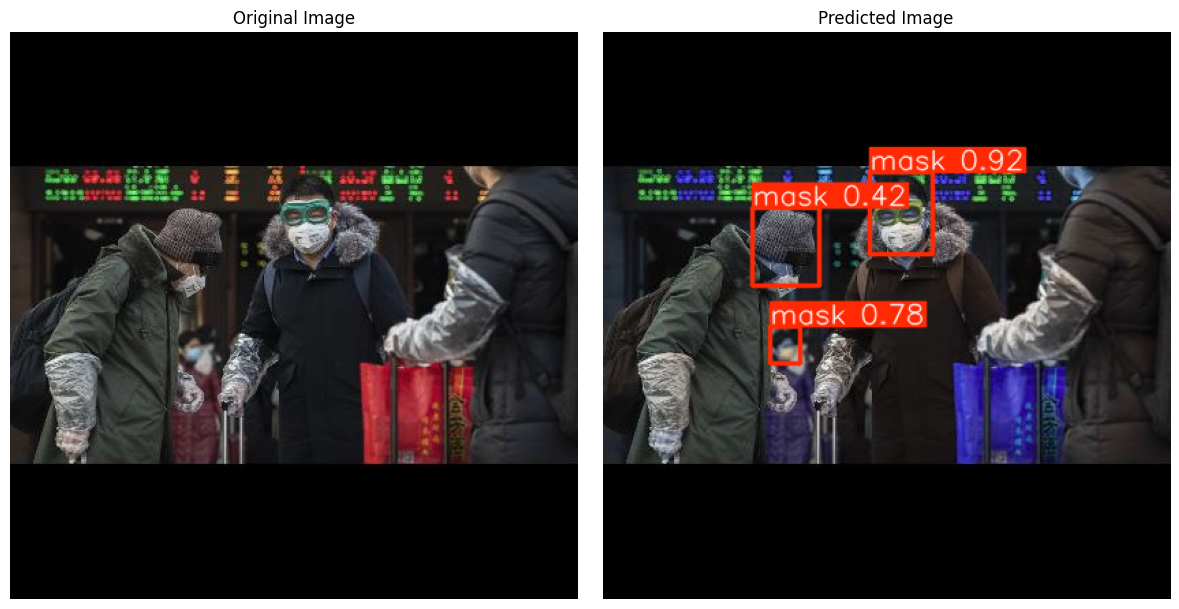

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Perform prediction
results = model.predict(
    source="/content/mask_wearing/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg",
    save=True,
    show=True
)

# Load the original image
original_image = Image.open("/content/mask_wearing/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg")

# Load the predicted image (saved by YOLO)
predicted_image = results[0].plot()

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Predicted image
plt.subplot(1, 2, 2)
plt.imshow(predicted_image)
plt.title("Predicted Image")
plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
model.export(format='torchscript')  # Export model to TorchScript

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 6, 3549) (5.2 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.5s, saved as 'runs/detect/train/weights/best.torchscript' (10.4 MB)

Export complete (2.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=416  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=416 data=/content/mask_wearing/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'